### Data from the New York Times

- fetched from the NYT archive api 

In [8]:
# example NYT API call

import requests

api_key = 'your_key'
url = 'https://api.nytimes.com/svc/archive/v1/2019/1.json?api-key=' + api_key
nyt = requests.get(url)

- data contains all info published by the NYT from 2018-01-01 to 2022-11-14

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nyt_df = pd.read_csv('./Data/nyt_final.csv')
nyt_df['date'] = pd.to_datetime(nyt_df['date'])
#nyt_df['year'] = nyt_df['pub_date'].str[:4]
print(len(nyt_df))
nyt_df.head()

263926


,Unnamed: 0,web_url,_id,word_count,subsection_name,author,document_type,date,all_text,stemmed
0,0,https://www.nytimes.com/2017/12/31/world/ameri...,nyt://article/e8919280-595f-5bb5-882d-ceee0774...,909.0,Americas,Matthew Haag,article,2018-01-01,The Costa Rican government said the crash occu...,costa rican govern crash occur mountain area p...
1,1,https://www.nytimes.com/2017/12/31/nyregion/me...,nyt://article/07a46192-a0f6-5090-b6da-7e5c6b49...,1503.0,NaN,Annie Correal,article,2018-01-01,Families have turned the side of a warehouse f...,famili turn side warehous face feder jail broo...
2,2,https://www.nytimes.com/2017/12/31/opinion/new...,nyt://article/d8364ef4-cf4d-5c45-97c5-12344a22...,928.0,NaN,Margaret Renkl,article,2018-01-01,Making New Year resolutions as a hedge against...,new resolut hedg apocalyps new resolut hedg ap...
3,3,https://www.nytimes.com/2017/12/31/opinion/us-...,nyt://article/537a3a67-44dc-5dfe-a0dd-936ed4e1...,190.0,NaN,NaN,article,2018-01-01,Egypt’s ambassador asserts that the country is...,egypt ambassador assert countri import alli co...
4,4,https://www.nytimes.com/2017/12/31/opinion/amt...,nyt://article/bb2b1380-5a3b-59f7-8d53-3a16ab5c...,330.0,NaN,NaN,article,2018-01-01,"Readers point to Congress, the Federal Railroa...",reader point congress feder railroad administr...


In [3]:
# add day of week feature mon=0 - sun=6
import datetime

days = []
for record in nyt_df['date']:
    days.append(datetime.datetime.weekday(record))
    
nyt_df['day_of_week'] = days

nyt_df['weekend'] = nyt_df['day_of_week']
nyt_df['weekend'] = nyt_df['weekend'].replace([0, 1, 2, 3, 4], 0)
nyt_df['weekend'] = nyt_df['weekend'].replace([5, 6], 1)

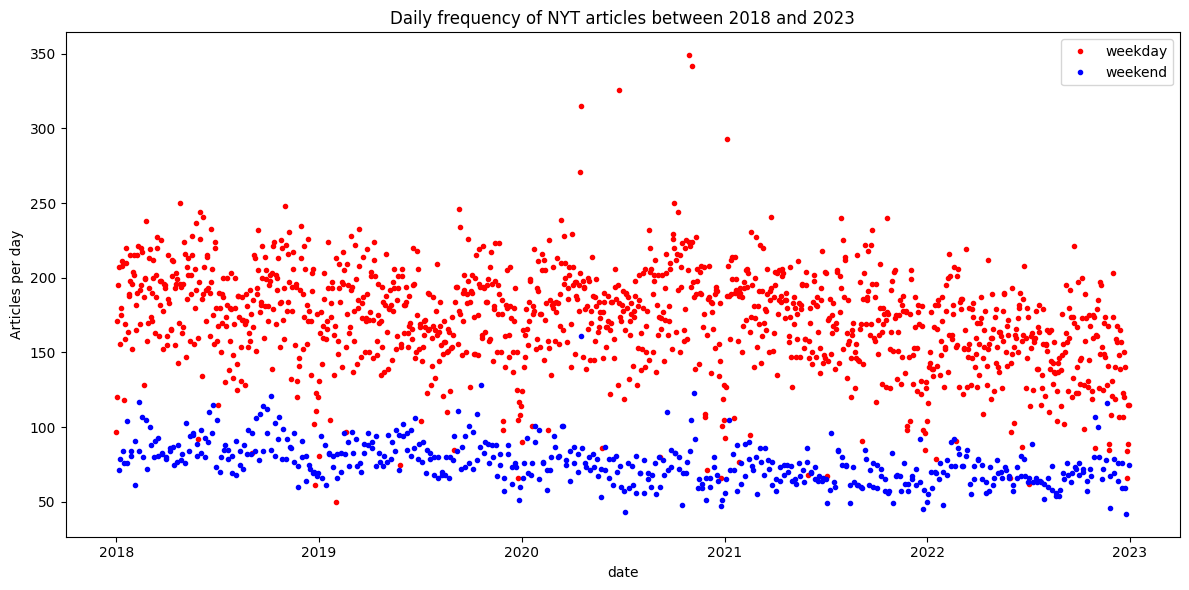

In [4]:
# article count distribution
nyt_df_weekday = nyt_df[nyt_df['weekend']==0] 
nyt_df_weekend = nyt_df[nyt_df['weekend']==1] 
nyt_df_weekday['date'].dt.date.value_counts().plot(style='.',figsize=(12, 6),color='r')
nyt_df_weekend['date'].dt.date.value_counts().plot(style='.',figsize=(12, 6),color='b')

plt.title('Daily frequency of NYT articles between 2018 and 2023')
plt.xlabel('Date')
plt.ylabel('Articles per day')
plt.legend(['weekday','weekend'])
plt.tight_layout()
plt.show()

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_21554/2703295392.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,50,100,150,200,250]) # weekly
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_21554/2703295392.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no', 'Mon','Tue','Wed','Thur','Fri','Sat','Sun'])


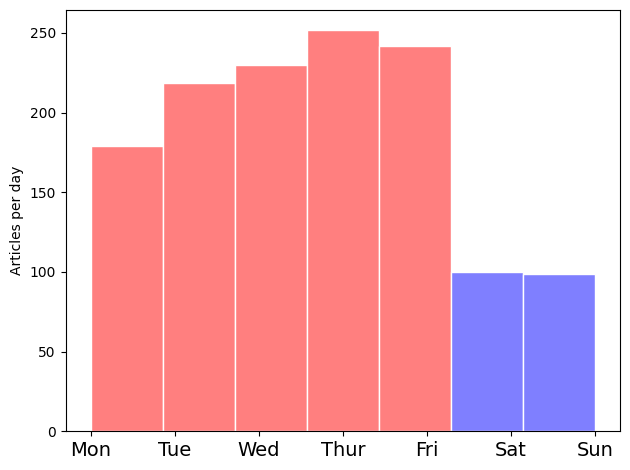

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
data = nyt_df['day_of_week']

N, bins, patches = ax.hist(data, bins=7, edgecolor='white', linewidth=1)

for i in range(0,5):    
    patches[i].set_facecolor([1,0,0,0.5])#'r')
for i in range(5, len(patches)):
    patches[i].set_facecolor([0,0,1,0.5])#'b')

ax.set_yticklabels([0,50,100,150,200,250]) # weekly
ax.set_ylabel('Articles per day')

ax.set_xticklabels(['no', 'Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
ax.tick_params(axis='x', labelsize=14)
plt.tight_layout()
plt.savefig('./results/pres/nyt_days_of_week.png')
plt.show()

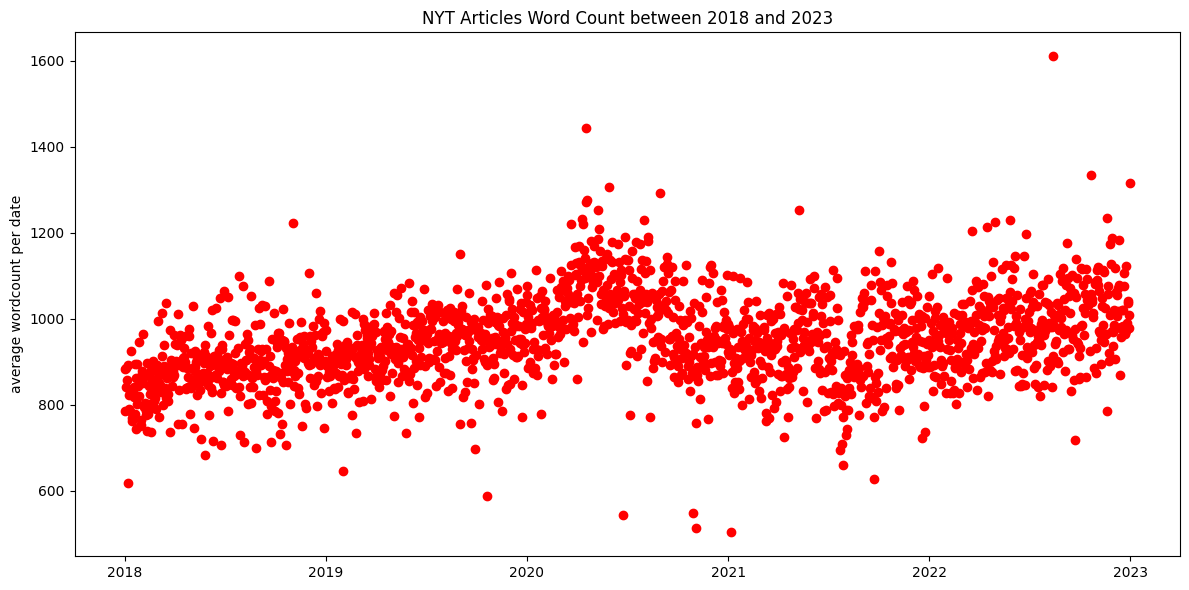

In [7]:
# word count has gone up slightly over the years
from matplotlib.pyplot import figure


grouped = nyt_df.groupby(nyt_df.date) # average per date
mean_len = grouped.word_count.mean()

fig=plt.figure(figsize =(12, 6))
#ax=fig.add_axes([0,0,1,1])
plt.scatter(grouped.groups.keys(), mean_len, color='r')
plt.title("NYT Articles Word Count between 2018 and 2023")
plt.ylabel('average wordcount per date')

plt.tight_layout()
plt.savefig('./results/pres/nyt_wordcount.png')
plt.show()

In [8]:
keywords_list = nyt_df['keywords'].to_list()
keywords_flat = [item for sublist in keywords_list for item in sublist]
print(len(keywords_flat))
pd.value_counts(np.array(keywords_flat)).head(50)

1583868


United States Politics and Government        31180
Trump, Donald J                              24671
Coronavirus (2019-nCoV)                      24185
Politics and Government                      14801
Books and Literature                         11911
Presidential Election of 2020                10282
Movies                                        9608
New York City                                 9265
Biden, Joseph R Jr                            9212
United States                                 8774
Democratic Party                              8722
Television                                    8122
Republican Party                              7465
United States International Relations         7396
Real Estate and Housing (Residential)         7240
Black People                                  7110
Blacks                                        7110
Deaths (Obituaries)                           6418
Women and Girls                               6272
Content Type: Personal Profile 

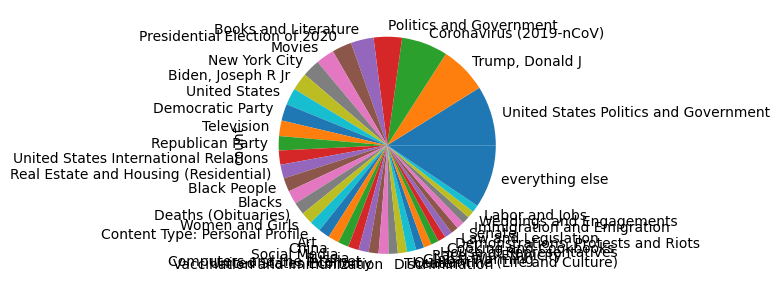

In [9]:
type_of_material = pd.value_counts(np.array(keywords_flat)).head(50)
to_plot = type_of_material[:40]
to_plot['everything else'] = sum(type_of_material[41:len(type_of_material)])
to_plot.plot.pie()
plt.rcParams['font.size'] = 7
plt.tight_layout()
plt.show()

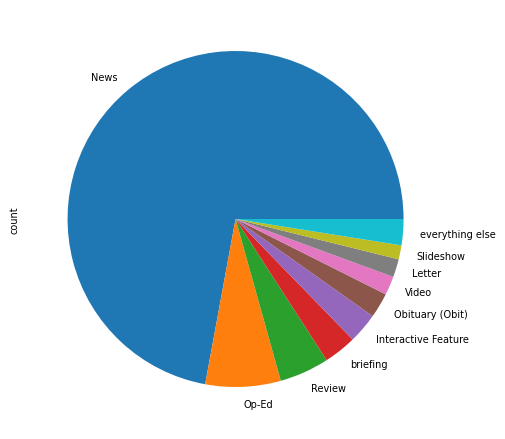

In [10]:
type_of_material = nyt_df.type_of_material.value_counts()
to_plot = type_of_material[:9]
to_plot['everything else'] = sum(type_of_material[10:len(type_of_material)])
to_plot.plot.pie()
plt.rcParams['font.size'] = 20
plt.tight_layout()
plt.savefig('./results/pres/nyt_pie.png')
plt.show()

In [32]:
# wordcloud for source of image url 
import matplotlib.pyplot as plt
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nyt_df['year'] = nyt_df.date.dt.year

# function to draw the word cloud
def wordcloud_year(year, nyt_df):  
    years_df = nyt_df[nyt_df.year==year] 
    to_wordcloud = " ".join(years_df['headline'])
    cloud = WordCloud(width =1000,height = 500).generate(to_wordcloud)
    #cloud.to_file("memeSourceUrlWordCloud.png")
    plt.imshow(cloud,interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout()
    plt.savefig('./results/pres/nyt_wordcloud.png')
    plt.show()

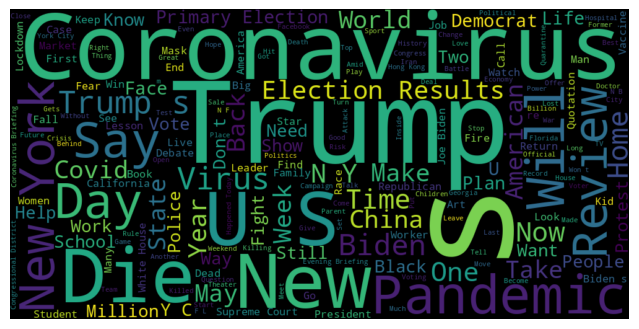

In [33]:
wordcloud = wordcloud_year(2020, nyt_df)
wordcloud

## Keywords analysis to estimate how many topics are appropriate

In [12]:
# join keywords in original df to search strings
nyt_df['keywords_join'] = [" ".join(rec) for rec in nyt_df['keywords']]

# create keywords analysis df
keyword_counts = pd.DataFrame(pd.value_counts(np.array(keywords_flat)))
keyword_counts.reset_index(inplace=True)
keyword_counts.rename({0:'count','index':'keyword'},axis=1,inplace=True)
keyword_counts['count_dates'] = 0
keyword_counts['dates'] = np.empty((len(keyword_counts), 0)).tolist()
keyword_counts.head()

,keyword,count,count_dates,dates
0,United States Politics and Government,31180,0,[]
1,"Trump, Donald J",24671,0,[]
2,Coronavirus (2019-nCoV),24185,0,[]
3,Politics and Government,14801,0,[]
4,Books and Literature,11911,0,[]


### Distribution

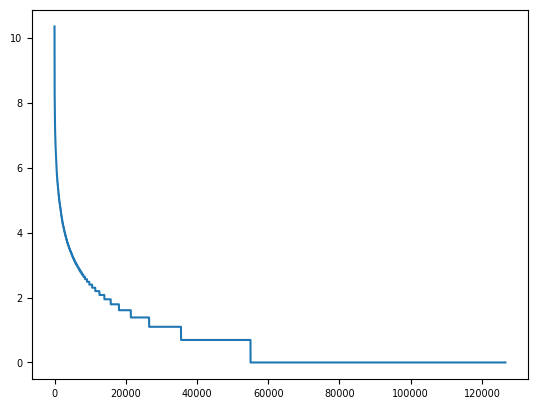

In [11]:
import matplotlib.pyplot as plt
keyword_counts['log_count'] = np.log(keyword_counts['count'])
plt.plot(keyword_counts['log_count'])
plt.show()

111
0.000420570839663998


<function matplotlib.pyplot.show(close=None, block=None)>

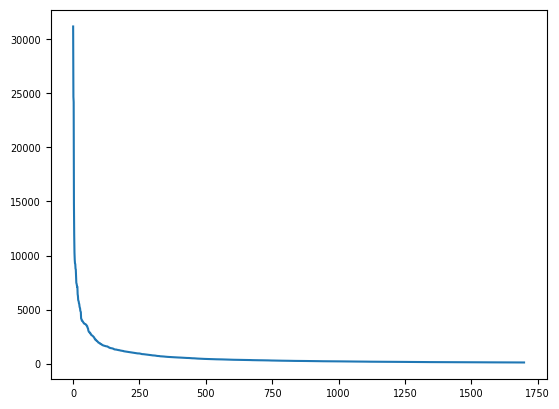

In [12]:
# what are the mininum number of articles to consider a topic? 1700 keywords are used in at least 100 articles
check = keyword_counts[0:1700]
print(check.at[1699,'count'])
print(check.at[1699,'count']/len(nyt_df))
plt.plot(check['count'])
plt.show

In [13]:
# function to count the number of dates that each keyword occurs on
nyt_df['keywords_join'] = [" ".join(rec) for rec in nyt_df['keywords']]
#nyt_df.drop(labels=['level_0','index'],axis=1,inplace=True)
nyt_df.reset_index(inplace=True)
keyword_counts = keyword_counts[0:1700]

from tqdm import tqdm

for i in tqdm(range(0,len(keyword_counts))):
    topic = keyword_counts.at[i,'keyword']
    for k in range(0, len(nyt_df)):
        if nyt_df.at[k,'keywords_join'].find(topic) != -1:
            keyword_counts.at[i,'count_dates'] += 1
            keyword_counts.at[i,'dates'].append(nyt_df.at[k,'date'])
    
keyword_counts.to_json('save_nyt_keywords.json')

100%|█████████████████████████████████████| 1700/1700 [1:07:28<00:00,  2.38s/it]


In [13]:
# load data
from tqdm import tqdm

keyword_counts = pd.read_json('save_nyt_keywords.json')

dates = []

for i in tqdm(range(0,len(keyword_counts))):
    day = [pd.to_datetime(date, unit='ms') for date in keyword_counts.at[i,'dates']]
    dates.append(day)
    
keyword_counts['dates'] = dates
keyword_counts.head()

100%|███████████████████████████████████████| 1700/1700 [03:12<00:00,  8.83it/s]


,keyword,count,count_dates,dates,log_count
0,United States Politics and Government,31180,31203,"[2018-01-01 00:00:00, 2018-01-01 00:00:00, 201...",10.347532
1,"Trump, Donald J",24671,24706,"[2018-01-01 00:00:00, 2018-01-01 00:00:00, 201...",10.113384
2,Coronavirus (2019-nCoV),24185,24185,"[2020-01-09 00:00:00, 2020-01-11 00:00:00, 202...",10.093488
3,Politics and Government,14801,44694,"[2018-01-01 00:00:00, 2018-01-01 00:00:00, 201...",9.602450
4,Books and Literature,11911,11910,"[2018-01-01 00:00:00, 2018-01-01 00:00:00, 201...",9.385218


In [15]:
# get max abs derivitive
import swifter

def get_gradient(dates):
    # x y data for dates the keyword occured on
    plotobj = pd.DataFrame(dates)
    y = plotobj[0].dt.date.value_counts().sort_index(); x = np.linspace(0,len(y),len(y))
    # get derivative
    theta = np.polyfit(x, y, 5)
    y_line = theta[5] + theta[4] * pow(x, 1) + theta[3] * pow(x, 2) + theta[2] * pow(x, 3) + theta[1] * pow(x, 4) + theta[0] * pow(x, 5)
    deriv = np.gradient(y_line)
    # return max abs value
    return max(deriv.min(), deriv.max(), key=abs)

df_with_grad = keyword_counts.dates.swifter.apply(lambda row: get_gradient(row))
keyword_counts['5_deg_max_grad'] = df_with_grad

Pandas Apply:   0%|          | 0/1700 [00:00<?, ?it/s]

In [16]:
# get max per day article count
import swifter

def get_max_count(dates):
    plotobj = pd.DataFrame(dates)
    y = plotobj[0].dt.date.value_counts()
    return y[0]

df_with_count = keyword_counts.dates.swifter.apply(lambda row: get_max_count(row))
keyword_counts['max_articles_per_day'] = df_with_count

Pandas Apply:   0%|          | 0/1700 [00:00<?, ?it/s]

In [17]:
# get number of dates with this topic
import swifter

def get_count_dates(dates):
    plotobj = pd.DataFrame(dates)
    y = plotobj[0].dt.date.value_counts()
    return len(y)

df_with_count = keyword_counts.dates.swifter.apply(lambda row: get_count_dates(row))
keyword_counts['count_dates'] = df_with_count

Pandas Apply:   0%|          | 0/1700 [00:00<?, ?it/s]

In [28]:
# what are the minimum number of dates to consider a topic?
len(keyword_counts[keyword_counts['count_dates']>50])

1691

In [29]:
# crop dataframe based on this criteria
keyword_counts = keyword_counts[keyword_counts['count_dates']>50]

In [30]:
# what is the minimum max articles per day to consider it a topic?
len(keyword_counts[keyword_counts['max_articles_per_day']>5])

827

In [31]:
# crop dataframe based on this criteria
keyword_counts = keyword_counts[keyword_counts['max_articles_per_day']>5]

In [33]:
# whats the minimum gradient value to consider a topic
len(keyword_counts[keyword_counts['5_deg_max_grad']>0.1])

127

In [72]:
# crop dataframe based on this criteria
keyword_counts = keyword_counts[keyword_counts['5_deg_max_grad']>0.1]

In [73]:
keyword_counts[0:50]

,keyword,count,count_dates,dates,log_count,5_deg_max_grad,max_articles_per_day
1,"Trump, Donald J",24421,1748,"[2018-01-01 00:00:00, 2018-01-01 00:00:00, 201...",10.103199,0.109327,65
2,Coronavirus (2019-nCoV),23956,1025,"[2020-01-09 00:00:00, 2020-01-11 00:00:00, 202...",10.083974,0.865728,157
5,Presidential Election of 2020,10140,1377,"[2018-01-08 00:00:00, 2018-01-08 00:00:00, 201...",9.224243,0.115623,329
20,Content Type: Personal Profile,5595,779,"[2018-07-26 00:00:00, 2019-06-17 00:00:00, 202...",8.629629,0.120891,47
37,Elections,3787,1691,"[2018-01-01 00:00:00, 2018-01-01 00:00:00, 201...",8.239329,0.241474,351
50,Ukraine,3453,816,"[2018-01-02 00:00:00, 2018-01-05 00:00:00, 201...",8.146999,0.218157,56
59,Primaries and Caucuses,2958,814,"[2018-01-22 00:00:00, 2018-01-23 00:00:00, 201...",7.992269,0.100680,154
61,Quarantines,2903,609,"[2019-04-26 00:00:00, 2019-04-27 00:00:00, 202...",7.973500,0.595664,41
69,Coronavirus Reopenings,2620,582,"[2020-04-25 00:00:00, 2020-05-09 00:00:00, 202...",7.870930,0.153604,31
82,Midterm Elections (2022),2221,318,"[2021-03-31 00:00:00, 2021-04-02 00:00:00, 202...",7.705713,2.298632,349


In [14]:
# search for a particular keyword
keyword_counts[keyword_counts['keyword'].str.contains("Queen", regex=False)]

,keyword,count,count_dates,dates,log_count
489,Queens (NYC),450,450,"[2018-01-04 00:00:00, 2018-01-11 00:00:00, 201...",6.109248
612,"Elizabeth II, Queen of Great Britain",358,358,"[2018-01-14 00:00:00, 2018-01-14 00:00:00, 201...",5.880533
1246,"Long Island City (Queens, NY)",163,163,"[2018-01-22 00:00:00, 2018-02-05 00:00:00, 201...",5.093750
1690,"Jackson Heights (Queens, NY)",112,112,"[2018-01-16 00:00:00, 2018-01-16 00:00:00, 201...",4.718499


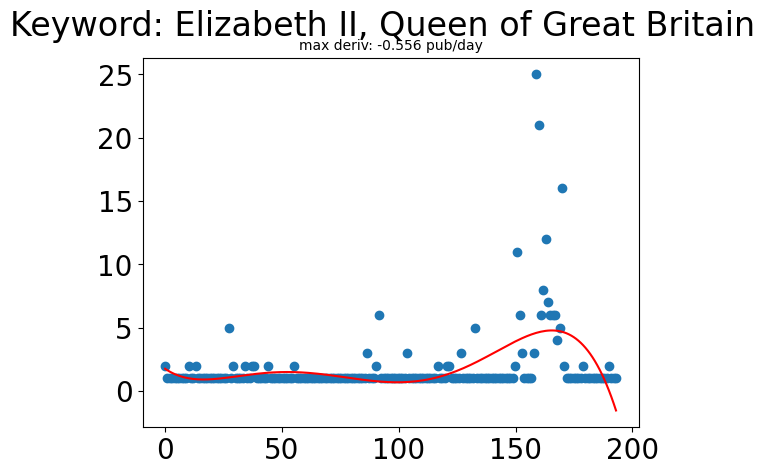

In [15]:
# interesting keywords: "Trump, Donald J", "Coronavirus (2019-nCoV)", "Vaccination and Immunization", "Russia", "Football", "Baseball", "Ukraine", "Biden", "Obama, Barak", "Clinton, Hillary Rodham", "Police Brutality, Misconduct and Shootings", "Mergers, Acquisitions and Divestures", "Primaries and Caucuses", "Quarantine (Life and Culture)", "Islamic State in Iraq and Syria (ISIS)", "Syria", "Refugees and Dispaced Persons", "Sexual Harassment", "Quarantines", "Sanders, Bernard", "Coronavirus Reopenings", "Elections, Senate", "Iraq", "Storming the Capitol", "Great Britain Withdrawl from EU"
import numpy as np
import matplotlib.pyplot as plt

num = 612
plotobj = pd.DataFrame(keyword_counts.at[num, 'dates'])
y = plotobj[0].dt.date.value_counts().sort_index(); x = np.linspace(0,len(y),len(y))
dates = y.index; dates = pd.to_datetime(dates)
#plotobj[0].dt.date.value_counts().plot(style='.',figsize=(12, 6),color='r')
plt.title(keyword_counts.at[num, 'keyword'])

# fit a 5 degree poly
theta = np.polyfit(x, y, 5)
y_line = theta[5] + theta[4] * pow(x, 1) + theta[3] * pow(x, 2) + theta[2] * pow(x, 3) + theta[1] * pow(x, 4) + theta[0] * pow(x, 5)
deriv = np.gradient(y_line)

plt.scatter(x,y)
plt.plot(x, y_line, 'r')

plt.suptitle('Keyword: ' + keyword_counts.at[num, 'keyword'])
plt.title(str('max deriv: ' + str(round(max(deriv.min(), deriv.max(), key=abs),3)) + ' pub/day'),fontsize=10)

# save plot data into dataframe
df = pd.DataFrame({'date':dates,'article_count':y,'y_poly':y_line,'x_poly':x,'deriv':deriv})

plt.show()

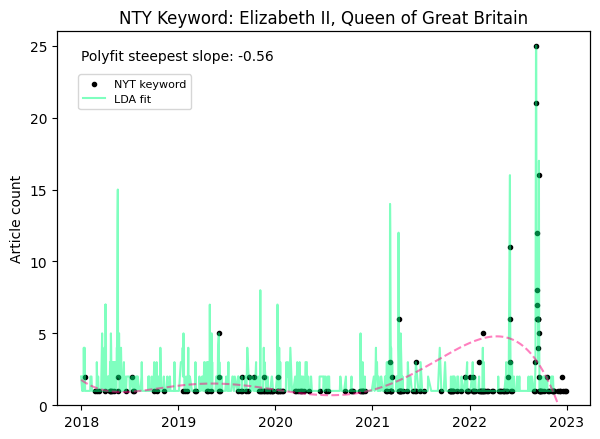

In [48]:
fig, ax = plt.subplots()
ax.scatter(df['date'],df['article_count'],marker=".",color='black')
ax2 = ax.twiny() 
ax2.get_xaxis().set_visible(False)
ax2.plot(df['x_poly'],df['y_poly'],color=[1,0,0.5,0.5],linestyle='--')
ax.set_ylim([0,26])
plt.title('NTY Keyword: Elizabeth II, Queen of Great Britain', fontsize=12)
ax.set_ylabel('Article count',fontsize=10)
plt.text(0,24,str('Polyfit steepest slope: '+str(round(df['deriv'].min(),2))),fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)

lda_elizabeth = pd.read_json('./results/pres/queen_elizabeth_article_counts.json')
ax.plot(lda_elizabeth,color=[0,1,0.5,0.5])
ax.legend(['NYT keyword','LDA fit'],loc='upper left', bbox_to_anchor=[0.03, 0.9],fontsize=8)
plt.tight_layout()

plt.savefig('./results/pres/queen_eliz_nyt_only.png')

plt.show()

In [77]:
# can re-index to deal with missing dates (fitting the polynomial to this isn't good though because of all of the added 0s)
idx = pd.date_range(df['date'].min(), df['date'].max())
df = df.reindex(idx, fill_value=0)
df.head()

,date,article_count,y_poly,x_poly,deriv
2018-01-14,2018-01-14 00:00:00,2,1.767972,0.0,-0.120303
2018-01-15,0,0,0.000000,0.0,0.000000
2018-01-16,0,0,0.000000,0.0,0.000000
2018-01-17,0,0,0.000000,0.0,0.000000
2018-01-18,0,0,0.000000,0.0,0.000000


127
91
0.0049754331605276125
0.274092079053499


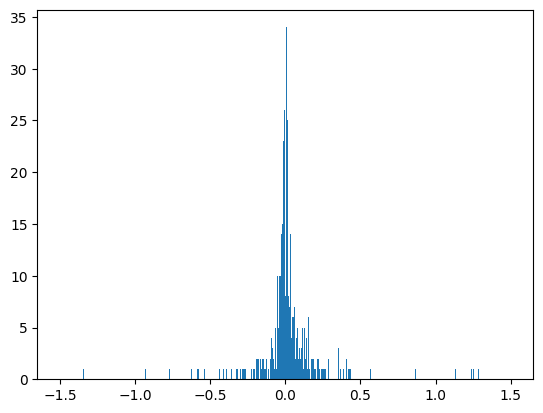

In [41]:
# distributions and standard deviations of max count and derivative variables?
plt.hist(keyword_counts['5_deg_max_grad'], bins=1000, range=[-1.5,1.5])
print(len(keyword_counts[keyword_counts['5_deg_max_grad'] > 0.1]))
print(len(keyword_counts[keyword_counts['5_deg_max_grad'] < -0.1]))
print(keyword_counts['5_deg_max_grad'].mean()) # it's interesting that the mean is slightly above zero - means that there is a sharper increase in publishing a topic, followed by a more gradual decline - makes sense
print(keyword_counts['5_deg_max_grad'].std())
plt.show()